# __Projet Optimisation enclos mouton__

## __1) Etude du problème d'Optimisation__

### __Réponse 1__

On cherche à optimiser $z = (y_0,...,y_N)$ qui est de taille $N + 1$.

### __Réponse 2__

On souhaite maximiser $- J(z) =\frac{1}{2} \sum_{i = 0}^{N-1} (x_{i+1}-x_i)(y_{i+1} + y_i)$ qui représente l'aire de l'enclos.

### __Réponse 3__

On a les contraintes suivantes :

$$h_i(z) = -y_i \leq 0$$ pour $i = 1$ à $N-1$ et $y_0 = y_N = 0$
et $$\sum_{i = 0}^{N-1} \sqrt{(x_{i+1} - x_i)^2 + (y_{i+1} -y_i)^2} - L = 0$$ 

On peut se contenter de garder que la dernière contrainte que l'on notera $g(z) = 0$

Ansi le problème est $$\min_{z \in \mathbb{R}^n,g(z) = 0} J(z)$$

### __Réponse 4__

Considérons $z_1$ et $z_2$ ainsi que $t \in [0,1]$. On a donc 

$$J(tz_1 + (1-t)z_2) = -\frac{1}{2}\sum_{i=0}^{N-1} \left((x_{i+1}^1 - x_i^1) + (x_{i+1}^2 - x_i^2) \right) \left(t(y_{i+1}^1 + y_1^1) + (1-t)(y_{i+1}^2 + y_i^2) \right)$$
$$ = -\frac{1}{2}\sum_{i=0}^{N-1} t(x_{i+1}^1 - x_i^1)(y_{i+1}^1 + y_1^1) + (1-t) (x_{i+1}^2 - x_i^2)(y_{i+1}^2 + y_i^2) + (1-t)(x_{i+1}^1 - x_i^1)(y_{i+1}^2 + y_i^2) + t(x_{i+1}^2 - x_i^2)(y_{i+1}^1 + y_1^1)$$
$$ = tJ(z_1) + (1-t)J(z_2) -\frac{1}{2}\sum_{i=0}^{N-1}(1-t) (x_{i+1}^1 - x_i^1)(y_{i+1}^2 + y_i^2) + t(x_{i+1}^2 - x_i^2)(y_{i+1}^1 + y_1^1)$$
$$ = tJ(z_1) + (1-t)J(z_2) - H(z_1,z_2)$$

Avec $H(z_1,z_2) = \frac{1}{2}\sum_{i=0}^{N-1} (1-t)(x_{i+1}^1 - x_i^1)(y_{i+1}^2 + y_i^2) + t(x_{i+1}^2 - x_i^2)(y_{i+1}^1 + y_1^1)$

A priori $H$ peut être négatif si $\forall k,i \in \{1,2\}\times [0,N] y_i^k < 0$

Or on a les conditions $\forall k,i \in \{1,2\}\times [0,N]$  $y_i^k \geq 0$. Sous ces conditions $H$ est tout le temps positif.

Donc $J(tz_1 + (1-t)z_2) \leq tJ(z_1) + (1-t)J(z_2)$

Donc a priori le problème est convexe.

## __2) Résolution numérique__

### __Réponse 5__

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from scipy.integrate import simps

%matplotlib inline

Si `init_guess` n'est pas donné, on peut l'initialiser avec toutes ses composantes égales à $y_{max} = \frac{L + a - b}{2}$ sauf la première et la dernière a $0$. En effet, dans ce cas la longueur de la corde est très proche de $L$. 

In [3]:
a = 0
b = 10
N = 100

In [4]:

 def dist(y,x):
     return sum(np.sqrt((y[i+1]-y[i])**2 + (x[i+1]-x[i])**2) for i in range(len(x)-1))
     

In [5]:
def optimal_curve(a,b,L,N=40,d=None, init_guess = None):
   
    def J(y,x):
        return -sum((y[i]+y[i+1])*(x[i+1]-x[i]) for i in range(N))
    def g(y,x,L):
        return sum(np.sqrt((y[i+1]-y[i])**2 + (x[i+1]-x[i])**2) for i in range(N)) - L


    if d == None:
        d = np.linspace(a,b,N+1,endpoint = True)

    if init_guess == None:
        init_guess = np.array([0]+[(L+a-b)/2]*(N-1)+[0])

    cons = ({'type' : 'eq' , 'fun' : g , 'args' : [d,L]}, {'type' : 'eq' , 'fun' : lambda x : x[0] } , {'type' : 'eq' , 'fun' : lambda x : x[-1] })

    y_opt = opt.minimize(J,init_guess, d,constraints = cons , method = 'SLSQP', options = {'maxiter' : 1000, 'disp' : False})

    return y_opt,d,init_guess
    
    


### __Réponse 6__

On choisit d'utiliser le solveur de scipy.optimize pour une première raison simple : casAdi ne fonctionne ni chez l'un ni chez l'autre. 

Nous avons aussi fait le choix de scipy.optimize car il est plus commode à prendre en main.

### __Réponse 7__

On choisit L = 20
Longueur initiale trouvée : 19.801999800039972
Longueur finale trouvée : 20.000000076968824


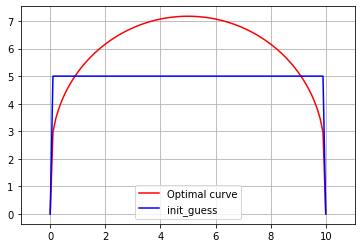

In [6]:
N = 100
data = optimal_curve(a,b,20,N)

x = data[1]
y = data[0].x

print(f"On choisit L = {20}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(x,y,c = 'r', label = 'Optimal curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

On choisit L = 100
Longueur initiale trouvée : 99.80022222194802
Longueur finale trouvée : 100.00000006964015


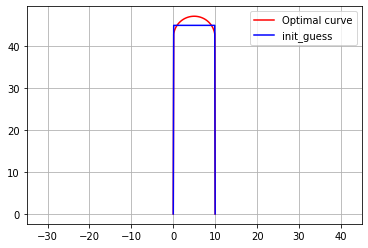

In [7]:
N = 100
data = optimal_curve(a,b,100,N)

x = data[1]
y = data[0].x

print(f"On choisit L = {100}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(x,y,c = 'r', label = 'Optimal curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

Comme on pouvait s'y attendre, la solution optimale semble être un rectangle prolongé d'un demi cercle. En effet, nous pouvons comparer cette étude au gonflement d'un ballon au sein d'un tube : tant que le ballon n'atteint pas son volume maximal sans elasticité il va coller au tube puis une fois cette limite atteinte il va former une demie-sphère. 

Dans le cas où on prendrait $L = \frac{\pi}{2}(b-a)$ on devrait s'attendre donc à avoir un demi cercle seul. C'est ce que l'on vérifie :

On choisit L = 15.707963267948966
Longueur initiale trouvée : 15.511466069955642
Longueur finale trouvée : 15.707963422674805


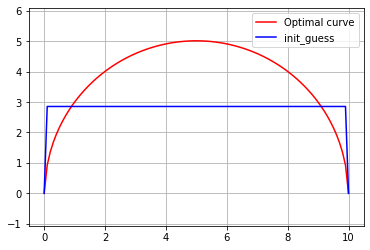

In [8]:
N = 100
data = optimal_curve(a,b,np.pi*(b-a)/2,N)

x = data[1]
y = data[0].x

print(f"On choisit L = {np.pi*(b-a)/2}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(x,y,c = 'r', label = 'Optimal curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

## __3) Ajout d'une contrainte__

### __Réponse 8__

On pose $h(z) = z - y_{max \, river}$. On a donc juste à reprendre le problème précédent en ajoutant la contrainte $h(z) \leq 0$.


### __Réponse 9__

In [9]:
import pandas as pd
from scipy.interpolate import interp1d
df = pd.read_csv('.\groupe_5_river_positions.csv ')
x_ref , y_ref = np.array(df['x']), np.array(df['y'])
y_max_river = interp1d(x_ref , y_ref )

Longueur max possible : 282.9934388751203


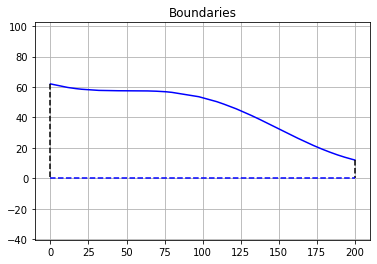

In [10]:
X = np.linspace(x_ref[0],x_ref[-1],1000)
Y = y_max_river(X)

plt.plot(X,Y, c = 'b')
plt.plot([X[0],X[0]],[Y[1],0], c = 'black', linestyle = '--')
plt.plot([X[-1],X[-1]],[Y[-1],0], c = 'black', linestyle = '--')
plt.plot([X[0],X[-1]],[0,0], c = 'b', linestyle = '--')

print(f"Longueur max possible : {dist(Y,X) + Y[0] + Y[-1]}")

plt.grid()
plt.axis('equal')
plt.title('Boundaries')
plt.show()

In [11]:
def optimal_bounded_curve(a,b,L,y_max_river, N=40,d=None, init_guess = None):
    
    def J(y,x):
        return -sum((y[i]+y[i+1])*(x[i+1]-x[i]) for i in range(len(y)-1))
    def g(y,x,L):
        return sum(np.sqrt((y[i+1]-y[i])**2 + (x[i+1]-x[i])**2) for i in range(len(y)-1)) - L


    if d == None:
        d = np.linspace(a,b,N+1,endpoint = True)

    if init_guess == None:
        init_guess = np.array([0]+[min(y_max_river(d))]*(N-1)+[0])

    cons = [{'type' : 'eq' , 'fun' : g , 'args' : [d,L]}, {'type' : 'eq' , 'fun' : lambda x : x[0] } , {'type' : 'eq' , 'fun' : lambda x : x[-1] } ] 

    bound = [(0,y_max_river(item)) for item in d]

    y_opt = opt.minimize(J , init_guess , args = d , constraints = cons , method = 'SLSQP', options = {'maxiter' : 1000, 'disp' : False}, bounds = bound  )
    return y_opt,d,init_guess

On choisit L = 250
Longueur initiale trouvée : 206.6476151587624
Longueur finale trouvée : 249.9999999996574


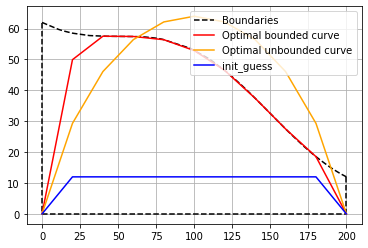

In [12]:
N = 10

data = optimal_bounded_curve(x_ref[0],x_ref[-1],250,y_max_river,N, d= None)
data2 = optimal_curve(x_ref[0],x_ref[-1],250,N)

x = data[1]
y = data[0].x

x2 = data2[1]
y2 = data2[0].x

print(f"On choisit L = {250}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(X,Y, c = 'black', label = 'Boundaries', linestyle = '--')
plt.plot([X[0],X[0]],[Y[1],0], c = 'black', linestyle = '--')
plt.plot([X[-1],X[-1]],[Y[-1],0], c = 'black', linestyle = '--')
plt.plot([X[0],X[-1]],[0,0], c = 'black', linestyle = '--')

plt.plot(x,y,c = 'r', label = 'Optimal bounded curve')
plt.plot(x2,y2,c = 'orange', label = 'Optimal unbounded curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

On choisit L = 250
Longueur initiale trouvée : 211.2409987036266
Longueur finale trouvée : 250.00000000056394


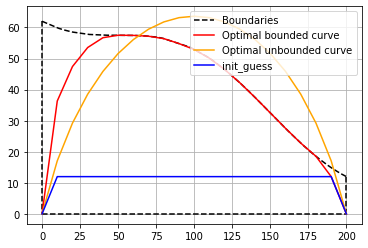

In [13]:
N = 20

data = optimal_bounded_curve(x_ref[0],x_ref[-1],250,y_max_river,N, d= None)
data2 = optimal_curve(x_ref[0],x_ref[-1],250,N)

x = data[1]
y = data[0].x

x2 = data2[1]
y2 = data2[0].x

print(f"On choisit L = {250}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(X,Y, c = 'black', label = 'Boundaries', linestyle = '--')
plt.plot([X[0],X[0]],[Y[1],0], c = 'black', linestyle = '--')
plt.plot([X[-1],X[-1]],[Y[-1],0], c = 'black', linestyle = '--')
plt.plot([X[0],X[-1]],[0,0], c = 'black', linestyle = '--')

plt.plot(x,y,c = 'r', label = 'Optimal bounded curve')
plt.plot(x2,y2,c = 'orange', label = 'Optimal unbounded curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

On choisit L = 250
Longueur initiale trouvée : 217.29822128134703
Longueur finale trouvée : 250.11887658311744


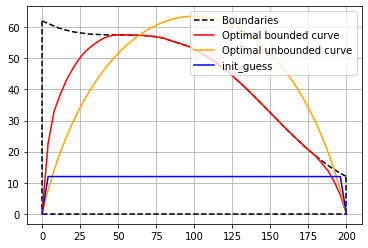

In [68]:
N = 50

data = optimal_bounded_curve(x_ref[0],x_ref[-1],250,y_max_river,N, d= None)
data2 = optimal_curve(x_ref[0],x_ref[-1],250,N)

x = data[1]
y = data[0].x

x2 = data2[1]
y2 = data2[0].x

print(f"On choisit L = {250}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(X,Y, c = 'black', label = 'Boundaries', linestyle = '--')
plt.plot([X[0],X[0]],[Y[1],0], c = 'black', linestyle = '--')
plt.plot([X[-1],X[-1]],[Y[-1],0], c = 'black', linestyle = '--')
plt.plot([X[0],X[-1]],[0,0], c = 'black', linestyle = '--')

plt.plot(x,y,c = 'r', label = 'Optimal bounded curve')
plt.plot(x2,y2,c = 'orange', label = 'Optimal unbounded curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

On choisit L = 250
Longueur initiale trouvée : 220.3310501211929
Longueur finale trouvée : 250.00000017758757


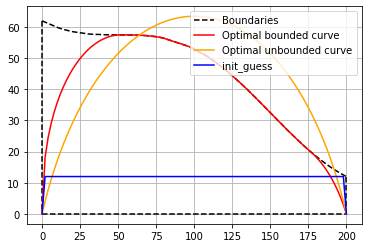

In [15]:
N = 100

data = optimal_bounded_curve(x_ref[0],x_ref[-1],250,y_max_river,N, d= None)
data2 = optimal_curve(x_ref[0],x_ref[-1],250,N)

x = data[1]
y = data[0].x

x2 = data2[1]
y2 = data2[0].x

print(f"On choisit L = {250}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(X,Y, c = 'black', label = 'Boundaries', linestyle = '--')
plt.plot([X[0],X[0]],[Y[1],0], c = 'black', linestyle = '--')
plt.plot([X[-1],X[-1]],[Y[-1],0], c = 'black', linestyle = '--')
plt.plot([X[0],X[-1]],[0,0], c = 'black', linestyle = '--')

plt.plot(x,y,c = 'r', label = 'Optimal bounded curve')
plt.plot(x2,y2,c = 'orange', label = 'Optimal unbounded curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

## __4) Généralisation et amélioration__

### __Réponse 11__


In [16]:
import copy

In [109]:
def optimal(a,b,L,y_max_river, N=40,d=None, init_guess = None):
    def y_max(x):
        if a < x < b:
            return y_max_river(x)
        else:
            if x < a:
                return y_max_river(a)
            else:
                return y_max_river(b)
    y_max = np.vectorize(y_max)
    def J(z):
        return -sum((z[i+1]+z[i])*(z[N+1+i]-z[N+i]) for i in range(N-1))/2
    def g(z):
        return sum(np.sqrt((z[i+1]-z[i])**2 + (z[N+i+1]-z[N+i])**2) for i in range(N-1)) - L


    if d == None:
        d = np.linspace(a,b,N,endpoint = True)

    if init_guess == None:
        init_guess = np.array( [0] + [min(y_max(d))]*(N-2) + [0])

    

    cons = [{'type' : 'eq' , 'fun' : g}, {'type' : 'eq' , 'fun' : lambda x : x[0] } , {'type' : 'eq' , 'fun' : lambda x : x[N-1] },{'type' : 'eq' , 'fun' : lambda x : x[N] - a},{'type' : 'eq' , 'fun' : lambda x : x[-1] - b } ]
   

    bound = [(0,y_max(item)) for item in d] + [(a,b) for item in d]
    d2 = copy.copy(d)
    ig = copy.copy(init_guess)
    
    z = np.array(list(ig)+list(d2))

    y_opt = opt.minimize(J , z, constraints = cons , method = 'SLSQP', options = {'maxiter' : 1000, 'disp' : True},bounds = bound )
    return y_opt,d,init_guess

In [111]:
N = 50
L = 450
data = optimal(x_ref[0],x_ref[-1],L,y_max_river,N, d= None)
#data2 = optimal_curve(x_ref[0],x_ref[-1],250,N)
n = len(data[0].x)//2
x = data[0].x[n:]
y = data[0].x[:n]

#x2 = data2[1]
#y2 = data2[0].x
print(f"On choisit L = {L}")
print(f"Longueur initiale trouvée : {dist(data[2],data[1])}")
print(f"Longueur finale trouvée : {dist(y,x)}")

plt.plot(X,Y, c = 'black', label = 'Boundaries', linestyle = '--')
plt.plot([X[0],X[0]],[Y[1],0], c = 'black', linestyle = '--')
plt.plot([X[-1],X[-1]],[Y[-1],0], c = 'black', linestyle = '--')
plt.plot([X[0],X[-1]],[0,0], c = 'black', linestyle = '--')

plt.plot(x,y,c = 'r', label = 'Optimal bounded curve')
#plt.plot(x2,y2,c = 'orange', label = 'Optimal unbounded curve')
plt.plot(data[1],data[2], c = 'b', label = 'init_guess')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

ValueError: `x0` violates bound constraints.

ValueError: A value in x_new is above the interpolation range.

### __Réponse 12__

In [112]:
def courbure_max(x,y):
    n = len(x)
    return max([np.arctan((y[i+1]-y[i])/(x[i+1]-x[i])) - np.arctan((y[i+2]-y[i+1])/(x[i+2]-x[i+1])) for i in range(n-2)])

In [126]:
def optimal_curb_curve(a,b,L,N,tol):
    y_opt,d,_ = optimal_curve(a,b,L,N)
    i = 0
    tol_max = courbure_max(d,y_opt.x)
    while tol_max > tol:
        i += 1
        y_opt,d,_ = optimal_curve(a,b,L,N+i)
        tol_max = courbure_max(d,y_opt.x)
    return N+i,y_opt,d

On choisit L = 20
Longueur initiale trouvée : 14.142135623730951
Longueur finale trouvée : 20.000000049247003
On obtient une courbure optimale pour N = 64
La courbure max est :  0.20839997686936163


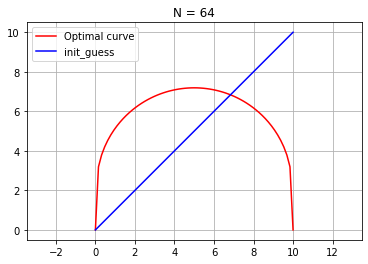

In [129]:
N = 5
data = optimal_curb_curve(a,b,20,N,np.pi/15)

new_N = data[0]
x = data[2]
y = data[1].x

print(f"On choisit L = {20}")
print(f"Longueur initiale trouvée : {dist(data[2],x)}")
print(f"Longueur finale trouvée : {dist(y,x)}")
print(f"On obtient une courbure optimale pour N = {data[0]}")
print(f"La courbure max est :  {courbure_max(x,y)}")
plt.plot(x,y,c = 'r', label = 'Optimal curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend()
plt.grid()
plt.title(f"N = {new_N}")
plt.axis('equal')
plt.show()